# 0. IMPORTS

In [71]:
import pandas as pd
import inflection
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

## 0.1. Data import

In [2]:
df_train = pd.read_csv('data/cardio_train.csv', delimiter = ';')

## 0.2. Helper Functions

## 0.3. Graph visualization

In [3]:

from IPython.core.display import HTML

def jupyter_settings():
   %matplotlib inline
   %pylab inline
   plt.style.use( 'bmh' )
   plt.rcParams['figure.figsize'] = [18, 8]
   plt.rcParams['font.size'] = 20
   display( HTML( '<style>.container { width:100% !important; }</style>') )
   pd.options.display.max_columns = None
   pd.options.display.max_rows = None
   pd.set_option( 'display.expand_frame_repr', False )
   sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 1. DESCRIBE DATA 

In [4]:
df1 = df_train.copy()

## 1.1. Rename Columns

In [5]:
cols_old = ['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 
            'alco', 'active', 'cardio']

df1 = df1.rename(columns = {'ap_hi': 'systolic_bp', 'ap_lo': 'diastolic_bp', 'gluc': 'glucose', 
                     'smoke': 'smoking', 'alco': 'alcohol_intake','active': 'physical_activity', 
                     'cardio': 'cardio_disease'})

In [6]:
df1.head()

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol_intake,physical_activity,cardio_disease
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 1.2. Data Dimensions

In [7]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 70000
Number of columns: 13


## 1.3. Data Types

In [8]:
df1.dtypes

id                     int64
age                    int64
gender                 int64
height                 int64
weight               float64
systolic_bp            int64
diastolic_bp           int64
cholesterol            int64
glucose                int64
smoking                int64
alcohol_intake         int64
physical_activity      int64
cardio_disease         int64
dtype: object

## 1.4. Check NA

In [9]:
df1.isna().sum()

id                   0
age                  0
gender               0
height               0
weight               0
systolic_bp          0
diastolic_bp         0
cholesterol          0
glucose              0
smoking              0
alcohol_intake       0
physical_activity    0
cardio_disease       0
dtype: int64

## 1.5. Fillout NA
(Not necessary)

## 1.6. Change Data Type

In [10]:
df1[['gender', 'cholesterol', 'glucose', 'smoking', 'alcohol_intake', 'physical_activity', 
          'cardio_disease']] = df1[['gender', 'cholesterol', 'glucose', 'smoking', 'alcohol_intake', 
          'physical_activity', 'cardio_disease']].astype('object')

In [11]:
df1.dtypes

id                     int64
age                    int64
gender                object
height                 int64
weight               float64
systolic_bp            int64
diastolic_bp           int64
cholesterol           object
glucose               object
smoking               object
alcohol_intake        object
physical_activity     object
cardio_disease        object
dtype: object

## 1.7. Descriptive Statistics


In [12]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64'])
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64'])

### 1.7.1. Numerical Variables

In [13]:
# Central Tendency - Mean, Median
ct1 = pd.DataFrame(num_attributes.mean())
ct2 = pd.DataFrame(num_attributes.median())

# Dispersion - Std, Min, Max, Range, Skew, Kurtosis
d1 = pd.DataFrame(num_attributes.std())
d2 = pd.DataFrame(num_attributes.min())
d3 = pd.DataFrame(num_attributes.max())
d4 = pd.DataFrame(num_attributes.max() - num_attributes.min())
d5 = pd.DataFrame(num_attributes.skew())
d6 = pd.DataFrame(num_attributes.kurtosis())

# concat
df_num = pd.concat([ct1, ct2, d1, d2, d3, d4, d5, d6], axis = 1)
df_num.columns = ['mean', 'median', 'std', 'min', 'max', 'range', 'skew', 'kurtosis']
df_num

,mean,median,std,min,max,range,skew,kurtosis
id,49972.419900,50001.5,28851.302323,0.0,99999.0,99999.0,-0.001278,-1.198374
age,19468.865814,19703.0,2467.251667,10798.0,23713.0,12915.0,-0.307055,-0.823447
height,164.359229,165.0,8.210126,55.0,250.0,195.0,-0.642187,7.943653
weight,74.205690,72.0,14.395757,10.0,200.0,190.0,1.012070,2.586825
systolic_bp,128.817286,120.0,154.011419,-150.0,16020.0,16170.0,85.296214,7580.074738
diastolic_bp,96.630414,80.0,188.472530,-70.0,11000.0,11070.0,32.114083,1425.914585


### 1.7.2. Categorical Variables

In [14]:
cat_attributes.apply( lambda x: x.unique().shape[0])

gender               2
cholesterol          3
glucose              3
smoking              2
alcohol_intake       2
physical_activity    2
cardio_disease       2
dtype: int64

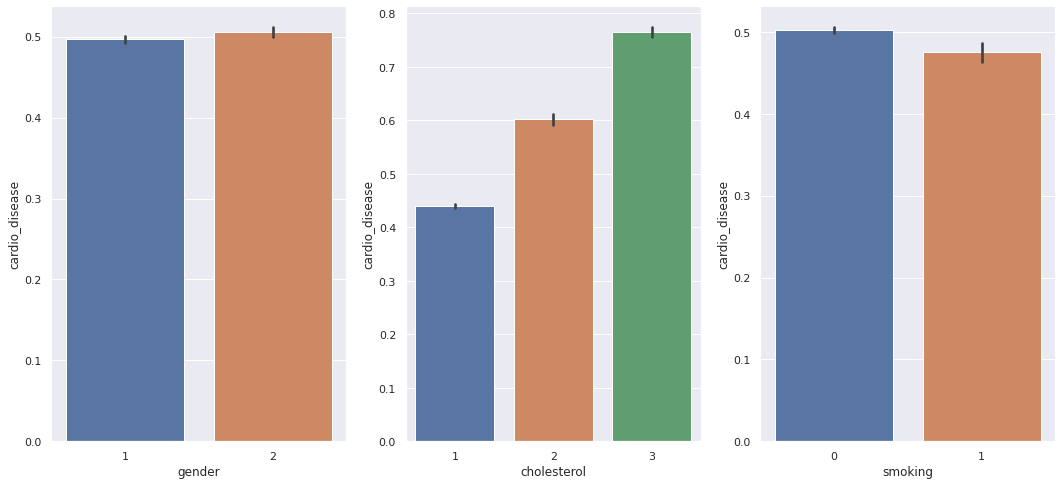

In [66]:
plt.subplot(1,3,1)
sns.barplot(x = "gender", y = "cardio_disease", data = df1);

plt.subplot(1,3,2)
sns.barplot(x = "cholesterol", y = "cardio_disease", data = df1);

plt.subplot(1,3,3)
sns.barplot(x = "smoking", y = "cardio_disease", data = df1);

# 2. FEATURE ENGINEERING

In [102]:
df2 = df1.copy()

## 2.1. Hypothesis Mind Map

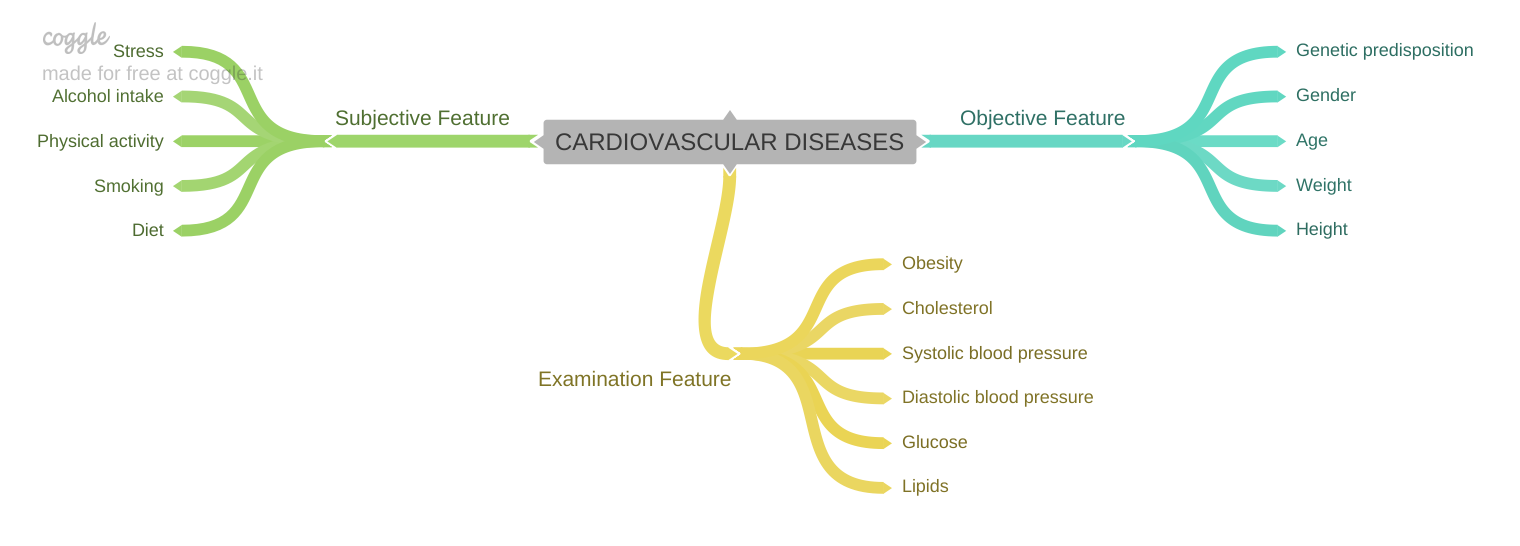

In [72]:
Image(filename='img/CARDIOVASCULAR_DISEASES.png')

## 2.2. Hypothesis Development

### 2.2.1. Objective Features

**1.** People with **some genetic predisposition** are **most likely to present** cardiovascular diseases.

**2.** **Men** are most likely to **present** cardiovascular diseases.

**3.** People with **overweight** are **most likely to present** cardiovascular diseases.

**4.** **Older** people are **most likely to present** cardiovascular diseases.

### 2.2.2. Subjective Features

**1.** People dealing with more daily **stress** are **most likely to present** cardiovascular diseases.

**2.** People who **drink alcohol** are **most likely to present** cardiovascular diseases.

**3.** People who practice regular **physical activities** are **less likely to present** cardiovascular diseases.

**4.** People who **smoke** are **most likely to present** cardiovascular diseases.

**5.** People with a **regular and healthy diet** are **less likely to present** cardiovascular diseases.

### 2.2.3. Examination Features

**1.** People with **obesity** are **most likely to present** cardiovascular diseases.

**2.** People who present **high cholesterol levels** are **most likely to present** cardiovascular diseases.

**3.** **High glucose levels** people are **most likely to present** cardiovascular diseases.

**4.** People with **hypertension** are **most likely to present** cardiovascular diseases.

## 2.3. Feature Engineering

In [113]:
df2.head()

,id,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol_intake,physical_activity,cardio_disease,bp_level
0,0,50,masculine,1.68,62.0,110,80,normal,normal,0,0,1,0,normal
1,1,55,feminine,1.56,85.0,140,90,well_above_normal,normal,0,0,1,1,hypertension
2,2,51,feminine,1.65,64.0,130,70,well_above_normal,normal,0,0,0,1,pre_hypertension
3,3,48,masculine,1.69,82.0,150,100,normal,normal,0,0,1,1,hypertension
4,4,47,feminine,1.56,56.0,100,60,normal,normal,0,0,0,0,normal


### 2.3.1. Created Columns

In [112]:
df2['bp_level'] = df2['systolic_bp'].apply(lambda x: 'normal' if x < 120 else 'pre_hypertension' if 120 <= x < 140 
                                           else 'hypertension')

### 2.3.2. Modified Columns

In [ ]:
df2['age'] = (df2['age']/365).astype('int64')

df2['gender'] = df2['gender'].apply(lambda x: 'feminine' if x == 1 else 'masculine')

df2['height'] = df2['height']/100

df2['cholesterol'] = df2['cholesterol'].apply(lambda x: 'normal' if x == 1 else 'above_normal' if x == 2 else 'well_above_normal')

df2['glucose'] = df2['glucose'].apply(lambda x: 'normal' if x == 1 else 'above_normal' if x == 2 else 'well_above_normal')

# 3. VARIABLE FILTERING

In [114]:
df3 = df2.copy()

In [134]:
df3.head()

,age,gender,height,weight,systolic_bp,diastolic_bp,cholesterol,glucose,smoking,alcohol_intake,physical_activity,cardio_disease,bp_level
0,50,masculine,1.68,62.0,110,80,normal,normal,0,0,1,0,normal
1,55,feminine,1.56,85.0,140,90,well_above_normal,normal,0,0,1,1,hypertension
2,51,feminine,1.65,64.0,130,70,well_above_normal,normal,0,0,0,1,pre_hypertension
3,48,masculine,1.69,82.0,150,100,normal,normal,0,0,1,1,hypertension
4,47,feminine,1.56,56.0,100,60,normal,normal,0,0,0,0,normal


## 3.1. Filtering Rows
Not necessary

## 3.2. Columns Selection

In [133]:
df3 = df3.drop('id', axis = 1)